<a href="https://colab.research.google.com/github/AnushiaS/Number-Plate-Detection/blob/main/numberplate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2025-05-12 09:04:17--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_russian_plate_number.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75482 (74K) [text/plain]
Saving to: ‘haarcascade_russian_plate_number.xml.1’

haarcascade_russian 100%[===================>]  73.71K  --.-KB/s    in 0.08s   

2025-05-12 09:04:17 (871 KB/s) - ‘haarcascade_russian_plate_number.xml.1’ saved [75482/75482]



Detected Plate Text: KL 31M 9090


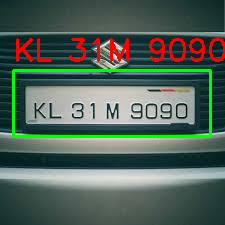

In [16]:
!pip install easyocr
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_russian_plate_number.xml
import cv2
import easyocr
# Import the necessary patch for Colab
from google.colab.patches import cv2_imshow

# Load the image
image_path = "car3.jpg"  # Replace with your image
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from {image_path}. Please check the file path and ensure the image is not corrupted.")
    # Exit the script or handle the error appropriately
    # For example, you could use sys.exit(1) to exit with an error code
    # Or you could display an error message and continue with other parts of your code
    # ...
else:
    # Load Haar cascade for number plate detection
    plate_cascade = cv2.CascadeClassifier('haarcascade_russian_plate_number.xml')
    # Check if the cascade file was loaded successfully
    if plate_cascade.empty():
        print("Error: Could not load Haar cascade file. Please check the file path and ensure it is not corrupted.")
        # Exit or handle the error appropriately
    else:

        # Convert image to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Detect plates
        plates = plate_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

        # Initialize OCR reader
        reader = easyocr.Reader(['en'])

        # Loop through detected plates
        for (x, y, w, h) in plates:
            plate_img = image[y:y+h, x:x+w]
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # OCR
            result = reader.readtext(plate_img)
            for detection in result:
                text = detection[1]
                print("Detected Plate Text:", text)
                cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

        # Show result using cv2_imshow instead of cv2.imshow
        # This is the fix for the DisabledFunctionError in Colab
        cv2_imshow(image)
        # cv2.waitKey(0)  # Remove this line as it's not needed in Colab
        # cv2.destroyAllWindows()  # Remove this line as it's not needed in Colab